In [2]:
import gymnasium as gym

from stable_baselines3 import SAC, DDPG, PPO


from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
from delay_model import *
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import torch
from wc_sac import *
from stable_baselines3.common.logger import Logger, configure
import datetime
import copy
from test_utils import *
from train_utils import *
from orchestrator import *
import pandas as pd
from safe_sac import SafeSAC

%load_ext autoreload
%autoreload 2

plt.rcParams['font.family'] = 'serif'

In [17]:
pend_agent, pend_env = train_default_sac(env_type = 'robotsteer', n_episodes=300, desired_state=[1.0, 0.5])

Observing state without wrappers
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/RobotSteer/state/fixed/0610/Desired[1.0, 0.5]/sac
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 120      |
|    ep_rew_mean     | -826     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 37       |
|    time_elapsed    | 12       |
|    total_timesteps | 480      |
| train/             |          |
|    actor_loss      | 12.9     |
|    critic_loss     | 1.92     |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 379      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 120      |
|    ep_rew_mean     | -829     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 34       |
|    time_elapsed  

Initial state was [0. 0. 0. 0.]


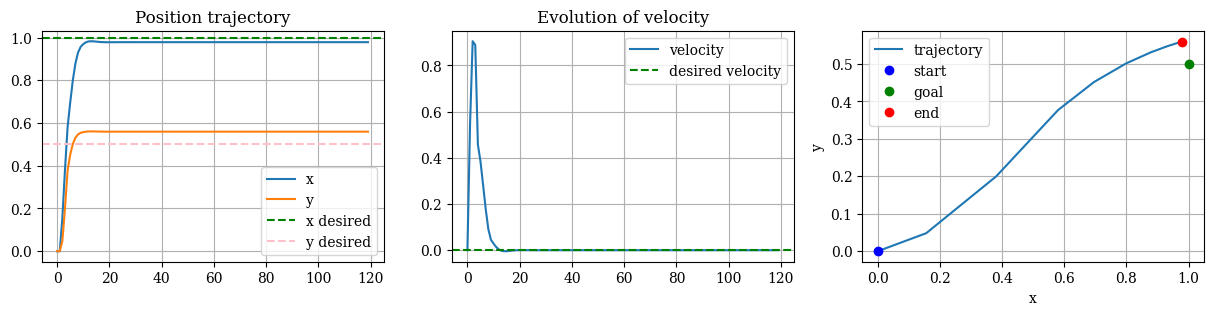

In [26]:
pend_env.unwrapped.start_state = np.array([0.0,0.0,0.0,0.0])
states, actions, rewards, average_rewards, executed = test_agent(pend_agent, pend_env, deterministic=True, state_error=True)
plot_test(pend_env, states, rewards, actions, executed, states_indexes=[1,2])